In [1]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
from adjustText import adjust_text

In [3]:
my_df = df[(df['job_title_short']=='Data Analyst') & (df['job_country'].isin(['United States','Canada']))].copy()
my_df['job_posted_month_no'] = my_df['job_posted_date'].dt.month
my_df_exploded = my_df.explode('job_skills')

In [25]:
my_df_pivot = my_df_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
my_df_pivot.loc['Total'] = my_df_pivot.sum()
my_df_pivot = my_df_pivot[my_df_pivot.loc['Total'].sort_values(ascending=False).index]
my_df_pivot = my_df_pivot.drop('Total')
my_df_pivot.iloc[:,:10]

job_skills,sql,excel,tableau,python,sas,power bi,r,word,powerpoint,oracle
job_posted_month_no,,,,,,,,,,
1,4744,3697,2550,2346,1868,1392,1552,997,1001,735
2,3246,2636,1697,1658,1234,1149,1061,753,719,525
3,3305,2710,1841,1727,1262,1077,1167,750,687,433
4,3323,2597,1830,1735,1328,1093,1063,709,663,448
5,2672,2184,1481,1404,998,892,895,568,529,365
6,2952,2453,1674,1659,1004,1022,1040,736,640,432
7,2713,2193,1588,1498,1016,931,913,596,563,416
8,3514,2779,2010,2089,1290,1253,1310,767,758,492
9,2421,1873,1416,1309,882,874,792,496,496,373


In [28]:
my_df_totals = my_df.groupby('job_posted_month_no').size()
my_df_percent = my_df_pivot.div(my_df_totals/100,axis=0)

In [29]:
my_df_percent = my_df_percent.reset_index()
my_df_percent['job_posted_month'] = my_df_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
my_df_percent = my_df_percent.set_index('job_posted_month')
my_df_percent = my_df_percent.drop(columns='job_posted_month_no')
my_df_percent

job_skills,sql,excel,tableau,python,sas,power bi,r,word,powerpoint,oracle,...,capacitor,chainer,gtx,ionic,microsoft lists,msaccess,qt,kotlin,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.031891,42.107062,29.043280,26.719818,21.275626,15.854214,17.676538,11.355353,11.400911,8.371298,...,0.01139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.753827,42.028061,27.056760,26.434949,19.674745,18.319515,16.916454,12.005740,11.463648,8.370536,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.859407,42.523145,28.887494,27.098698,19.802291,16.899419,18.311627,11.768398,10.779853,6.794288,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015691
Apr,53.355812,41.698780,29.383430,27.858060,21.323057,17.549775,17.068080,11.384072,10.645472,7.193320,...,0.00000,0.000000,0.000000,0.016057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,51.853289,42.383078,28.740539,27.246264,19.367359,17.310305,17.368523,11.022705,10.265865,7.083252,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.019406,0.000000,0.000000,0.000000,0.000000
Jun,50.323900,41.817252,28.537334,28.281623,17.115581,17.422434,17.729287,12.546880,10.910331,7.364473,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017047,0.017047,0.000000,0.000000
Jul,50.157145,40.543539,29.358477,27.694583,18.783509,17.212054,16.879275,11.018673,10.408578,7.690886,...,0.00000,0.000000,0.018488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.547602,40.765733,29.485111,30.643978,18.923280,18.380519,19.216664,11.251284,11.119261,7.217251,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.938119,38.634488,29.207921,27.000825,18.193069,18.028053,16.336634,10.231023,10.231023,7.693894,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# My Attempt

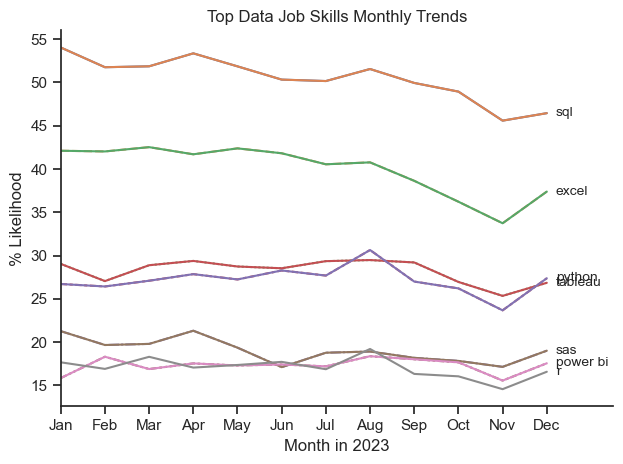

In [82]:
fig, ax = plt.subplots()
sns.set_theme(style='ticks')
sns.lineplot(data=my_df_percent.iloc[:,:6])
plt.xlabel('Month in 2023')
plt.xlim((0,12.5))
plt.ylabel('% Likelihood')
plt.title('Top Data Job Skills Monthly Trends')
ax.legend().set_visible(False)
for i, skill in enumerate(my_df_percent.columns[0:7]):
    ax.plot(my_df_percent.index, my_df_percent[skill], label=skill)
    x_pos = 11
    y_pos = my_df_percent[skill].iloc[-1]
    ax.text(x_pos + 0.2, y_pos, skill, fontsize=10, va='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

# Tutorial (with my own input)

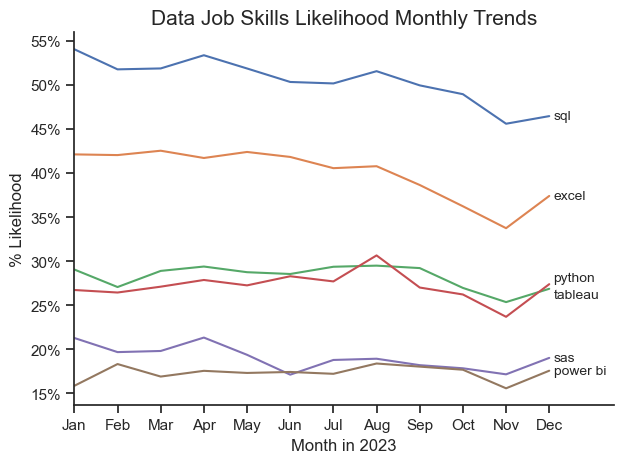

In [79]:
fig, ax = plt.subplots()
sns.set_theme(style='ticks')
sns.lineplot(data=my_df_percent.iloc[:,:6],dashes=False)
plt.xlabel('Month in 2023')
plt.xlim((0,12.5))
plt.ylabel('% Likelihood')
plt.title('Data Job Skills Likelihood Monthly Trends',fontsize=15)
ax.legend().set_visible(False)
for i, skill in enumerate(my_df_percent.columns[:6]):
    last_x = my_df_percent.index[-1]
    last_y = my_df_percent[skill].iloc[-1]
    if skill == 'python':
        offset = 0.75
    elif skill == 'tableau':
        offset = -0.75
    else:
        offset = 0

    ax.text(
        x=11.1,
        y=last_y + offset,
        s=skill,
        fontsize=10,
        va='center',
        ha='left'
    )
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y)}%'))
sns.despine()
fig.tight_layout()